In [6]:
import pandas as pd
import pyspark.sql.functions as F

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [7]:
%md ## Understanding the Data

UsageError: Line magic function `%md` not found.


In [8]:
# URL for the first dataset

url_1 = "https://raw.githubusercontent.com/OmarS489/the-fun-repo/the-lol-branch/data/CAPITALCOM_DXY%2C%201D_7d6db.csv"
url_2 = "https://raw.githubusercontent.com/OmarS489/the-fun-repo/the-lol-branch/data/CRYPTOCAP_TOTAL%2C%201D_5f95d.csv"
url_3 = "https://raw.githubusercontent.com/OmarS489/the-fun-repo/the-lol-branch/data/CRYPTOCAP_TOTAL2%2C%201D_2a8e1.csv"
url_4 = "https://raw.githubusercontent.com/OmarS489/the-fun-repo/the-lol-branch/data/CRYPTOCAP_TOTAL3%2C%201D_c180b.csv"
# Modified function to load and clean data from a URL
def remove_nan_columns_from_url(url, save=False):
    """
    Loads a dataset from a URL, removes columns with any NaN values, and returns the cleaned dataset.
    Optionally saves the cleaned dataset to a file.

    :param url: URL of the dataset file.
    :param save: Boolean, if True, the cleaned dataset is saved to a file.
    :return: Cleaned DataFrame.
    """
    # Load the dataset from the URL
    data = pd.read_csv(url)

    # Remove columns with any NaN values
    cleaned_data = data.dropna(axis=1)

    # Optionally save the cleaned dataset
    if save:
        # Create a new file name based on the URL
        new_file_name = url.split('/')[-1].split('.csv')[0] + '_cleaned.csv'
        cleaned_data.to_csv(new_file_name, index=False)
        return cleaned_data, new_file_name

    return cleaned_data

# Load and clean the first dataset
DXY_clean = remove_nan_columns_from_url(url_1)

TOTAL1_clean = remove_nan_columns_from_url(url_2)

TOTAL2_clean = remove_nan_columns_from_url(url_3)

TOTAL3_clean = remove_nan_columns_from_url(url_4)


In [9]:
if 'open_DXY' in DXY_clean.columns and 'close_DXY' in DXY_clean.columns:
    DXY_clean['Average_DXY'] = DXY_clean[['open_DXY', 'close_DXY']].mean(axis=1)
else:
    print("Columns 'open_DXY' and 'close_DXY' do not exist in DXY_clean DataFrame.")

if 'open_TOTAL1' in TOTAL1_clean.columns and 'close_TOTAL1' in TOTAL1_clean.columns:
    TOTAL1_clean['Average_Total1'] = TOTAL1_clean[['open_TOTAL1', 'close_TOTAL1']].mean(axis=1)
else:
    print("Columns 'open_TOTAL1' and 'close_TOTAL1' do not exist in TOTAL1_clean DataFrame.")

if 'open' in TOTAL2_clean.columns and 'close' in TOTAL2_clean.columns:
    TOTAL2_clean['Average_Total2'] = TOTAL2_clean[['open', 'close']].mean(axis=1)
else:
    print("Columns 'open' and 'close' do not exist in TOTAL2_clean DataFrame.")

if 'open_TOTAL3' in TOTAL3_clean.columns and 'close_TOTAL3' in TOTAL3_clean.columns:
    TOTAL3_clean['Average_Total3'] = TOTAL3_clean[['open_TOTAL3', 'close_TOTAL3']].mean(axis=1)
else:
    print("Columns 'open_TOTAL3' and 'close_TOTAL3' do not exist in TOTAL3_clean DataFrame.")


Columns 'open_DXY' and 'close_DXY' do not exist in DXY_clean DataFrame.
Columns 'open_TOTAL1' and 'close_TOTAL1' do not exist in TOTAL1_clean DataFrame.
Columns 'open_TOTAL3' and 'close_TOTAL3' do not exist in TOTAL3_clean DataFrame.


In [10]:
# Calculate the average of open and close prices for each variable
DXY_clean['Average_DXY'] = DXY_clean[['open_DXY', 'close_DXY']].mean(axis=1)
TOTAL1_clean['Average_Total1'] = TOTAL1_clean[['open_TOTAL1', 'close_TOTAL1']].mean(axis=1)
TOTAL2_clean['Average_Total2'] = TOTAL2_clean[['open', 'close']].mean(axis=1)
TOTAL3_clean['Average_Total3'] = TOTAL3_clean[['open_TOTAL3', 'close_TOTAL3']].mean(axis=1)

KeyError: "None of [Index(['open_DXY', 'close_DXY'], dtype='object')] are in the [columns]"

In [11]:
merged_data = DXY_clean.merge(TOTAL1_clean, on='time', how='inner', suffixes=('_DXY', '_TOTAL1')) \
                       .merge(TOTAL2_clean, on='time', how='inner', suffixes=('', '_TOTAL2')) \
                       .merge(TOTAL3_clean, on='time', how='inner', suffixes=('', '_TOTAL3'))

In [12]:
merged_data.to_csv('merged_data.csv', index=False)

In [13]:
print(merged_data.columns)

Index(['time', 'open_DXY', 'high_DXY', 'low_DXY', 'close_DXY', '5 Ema_DXY',
       '13 Ema_DXY', '50 Ema_DXY', '200 Ema_DXY', '800 Ema_DXY',
       'Upper 50 Ema Cloud_DXY', 'Lower 50 Ema Cloud_DXY', 'LWeek Hi_DXY',
       'LWeek Lo_DXY', 'PVSRA Volume_DXY', 'PVSRA Volume.1_DXY', '50 EMA_DXY',
       'open_TOTAL1', 'high_TOTAL1', 'low_TOTAL1', 'close_TOTAL1',
       '5 Ema_TOTAL1', '13 Ema_TOTAL1', '50 Ema_TOTAL1', '200 Ema_TOTAL1',
       '800 Ema_TOTAL1', 'Upper 50 Ema Cloud_TOTAL1',
       'Lower 50 Ema Cloud_TOTAL1', 'LWeek Hi_TOTAL1', 'LWeek Lo_TOTAL1',
       'PVSRA Volume_TOTAL1', 'PVSRA Volume.1_TOTAL1', '50 EMA_TOTAL1', 'open',
       'high', 'low', 'close', '5 Ema', '13 Ema', '50 Ema', '200 Ema',
       '800 Ema', 'Upper 50 Ema Cloud', 'Lower 50 Ema Cloud', 'LWeek Hi',
       'LWeek Lo', 'PVSRA Volume', 'PVSRA Volume.1', '50 EMA',
       'Average_Total2', 'open_TOTAL3', 'high_TOTAL3', 'low_TOTAL3',
       'close_TOTAL3', '5 Ema_TOTAL3', '13 Ema_TOTAL3', '50 Ema_TOTAL3',
     

In [14]:
# Calculate the average of open and close prices for each variable
merged_data['Average_DXY'] = merged_data[['open_DXY', 'close_DXY']].mean(axis=1)
merged_data['Average_Total1'] = merged_data[['open_TOTAL1', 'close_TOTAL1']].mean(axis=1)
merged_data['Average_Total2'] = merged_data[['open', 'close']].mean(axis=1)
merged_data['Average_Total3'] = merged_data[['open_TOTAL3', 'close_TOTAL3']].mean(axis=1)

# Calculate the average of the averages
merged_data['TargetVariable'] = merged_data[['Average_DXY', 'Average_Total1', 'Average_Total2', 'Average_Total3']].mean(axis=1)

                Average_DXY  Average_Total1  Average_Total2  Average_Total3
Average_DXY        1.000000       -0.348924       -0.610553       -0.444242
Average_Total1    -0.348924        1.000000        0.783206        0.680728
Average_Total2    -0.610553        0.783206        1.000000        0.947171
Average_Total3    -0.444242        0.680728        0.947171        1.000000


<Axes: >

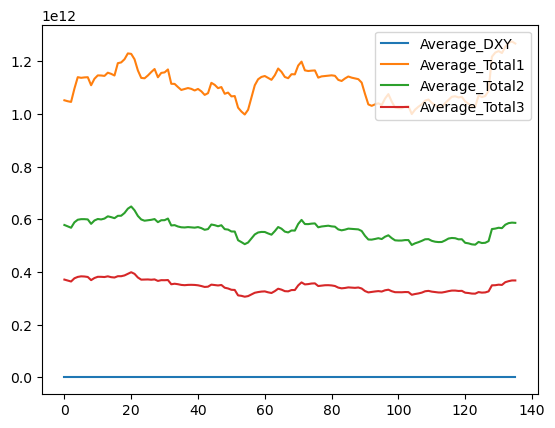

In [15]:
correlation_matrix = merged_data[['Average_DXY', 'Average_Total1', 'Average_Total2', 'Average_Total3']].corr()
print(correlation_matrix)

merged_data[['Average_DXY', 'Average_Total1', 'Average_Total2', 'Average_Total3']].plot()

<Axes: >

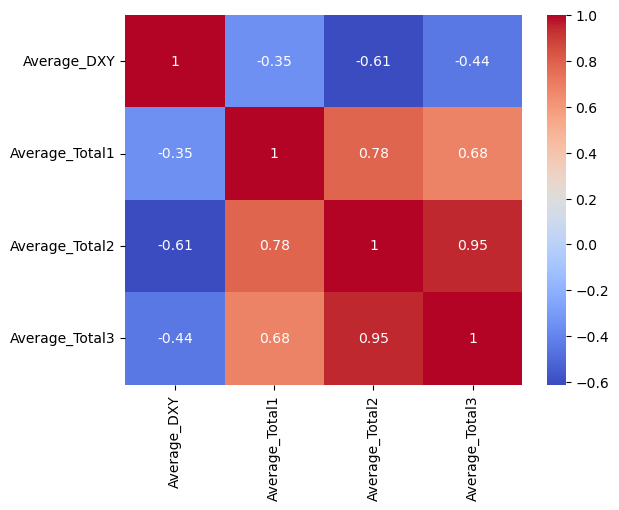

In [16]:
import seaborn as sns

correlation_matrix = merged_data[['Average_DXY', 'Average_Total1', 'Average_Total2', 'Average_Total3']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

RMSE: 16606213150.524704


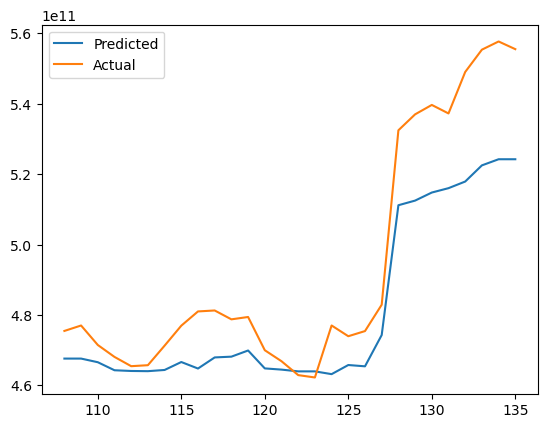

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingRegressor  # Add this import statement

# Train-Test Split
X = merged_data.drop('TargetVariable', axis=1)  # Replace 'TargetVariable' with your dependent variable
y = merged_data['TargetVariable']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-Test Split with imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, shuffle=False)

# Model Training
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Plotting predictions vs actual values
plt.plot(y_test.index, y_pred, label='Predicted')
plt.plot(y_test.index, y_test, label='Actual')
plt.legend()
plt.show()



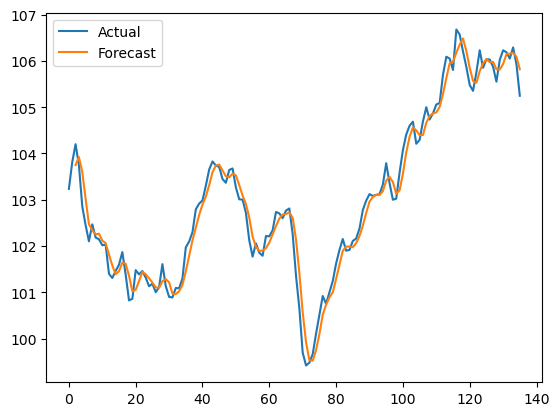

In [21]:
forecast = merged_data['Average_DXY'].rolling(window=3).mean()

plt.plot(merged_data['Average_DXY'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()


In [19]:
from lol import dxy, total1, total2, total3

print (dxy.head())

ModuleNotFoundError: No module named 'lol'